## Visualisierungen zu Nobel Preisen
<p> Nobelpreise gelten international als eine, wenn nicht die, höchste Wissenschaftliche Auszeichnun, die Wissenschaftlern verliehen werden kann.</p>
<p>Es wird jedoch nicht in jeder wissenschaftlichen Kategorie ein Nobelpreis verliehen, zum Beispiel gibt es keinen Nobelpreis für Mathematik. (Es gibt jedoch Mathematiker, die einen Nobelpreis erhalten haben - jedoch in einer Anderen Disziplin)</p>
<p> Die wichtigste Auszeichnung für Mathematiker ist wohl die Fields Medallie.</p>
Im Folgenden wird die Verteilung der Nobelpreise von 1901 bis 2016 untersucht.</p>
<p>Diese Notebook basiert auf einem begleiteten Projekt von DataCamp.</p>

In [1]:
#Load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

sns.set()
plt.rcParams['figure.figsize']=[11,7]

#read data
data=pd.read_csv('nobel.csv')

data.head(7)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany


# Verteilung der Preise
<p>Wir sehen, dass zumindest im Jahr 1901 alle Preise an europäische Männer gingen.</p>
<p>Angesichts der damaligen Stellung der Frauen in Gesellschaft und speziell der Wissenschaft, ist dies leider nicht überraschend.</p>
<p>Im Folgenden wird der Verlauf der Anteile weiblicher Gewinner dargestellt.</p>

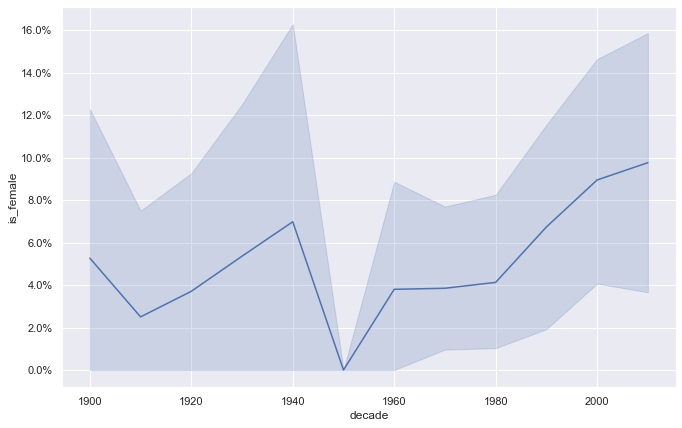

In [2]:
data['decade']=(np.floor(data['year']/10)*10).astype(int)
data['is_female']=data['sex']=='Female'
ax=sns.lineplot(data=data,x='decade',y='is_female')

#Percentage Formatting on y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

<p>Wir sehen also, dass bisher noch in jedem Jahr deutlich mehr Männer als Frauen mir Nobelpreisen ausgezeichnet werden.</p>
<p>Im Folgenden noch eine Aufstellung nach Fachgebieten</p>

,decade,category,is_female
64,2010,Peace,0.400000
50,1990,Literature,0.300000
56,2000,Literature,0.300000
62,2010,Literature,0.285714
40,1970,Peace,0.230769
11,1920,Literature,0.200000
52,1990,Peace,0.176471
21,1940,Literature,0.166667
57,2000,Medicine,0.153846
23,1940,Peace,0.142857


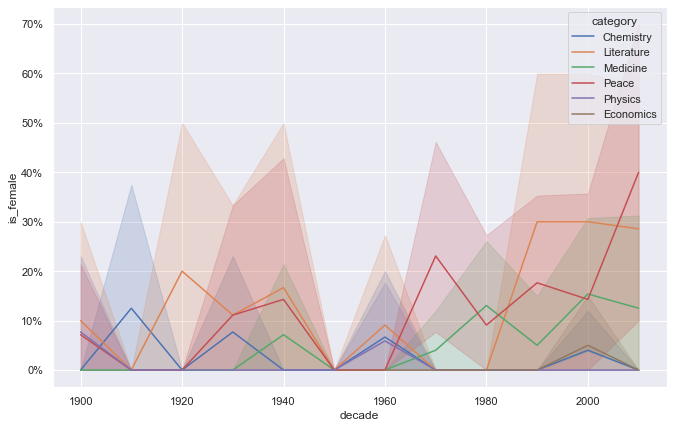

In [3]:
prop_female_winners=data.groupby(['decade','category'],as_index=False)['is_female'].mean()
display(prop_female_winners.sort_values('is_female',ascending=False).head(10))
ax=sns.lineplot(x='decade',y='is_female',data=data,hue='category')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

<p>Die erste weibliche Gewinnerin war:</p>

In [4]:
data[data['sex']=='Female'].nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,is_female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True


<p>Betrachten wir nun die Herkunftsländer der Gewinner.</p>

In [5]:
data['birth_country'].value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

<p>Es zeigt sich, dass eine überweltigende Mehrheit der ausgezeichneten Personen aus den Vereinigten Staaten stammen.</p>

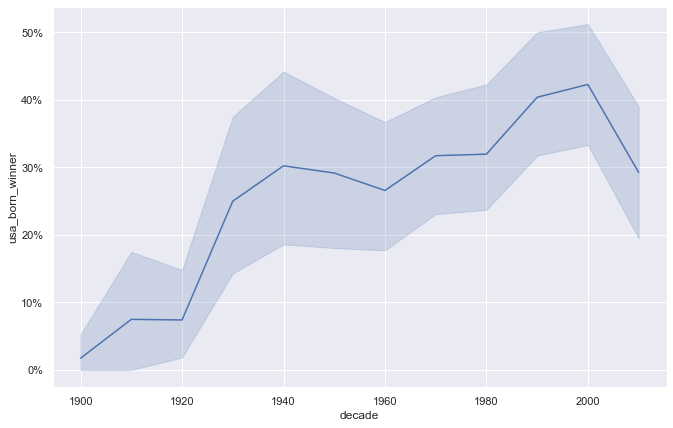

In [6]:
data['usa_born_winner']=data['birth_country']=='United States of America'
ax2=sns.lineplot(data=data,x='decade',y='usa_born_winner')
#Percentage Formatting
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

## Mehrfachgewinner
<p>Für die meisten Menschen ist der Gewinn eines Nobel Preises ein Traum in weiter Ferne. Auf der anderen Seite des Spektrums gibt es einige Wissenschaftler, die diese Auszeichnung sogar mehrfach gewonnen haben.</p>

In [7]:
data.groupby('full_name').filter(lambda x: len(x)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,is_female,usa_born_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True,False
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,True,False
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1950,False,True
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1950,False,True
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,1950,False,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1960,False,True
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,False,False


# Alter der Gewinner

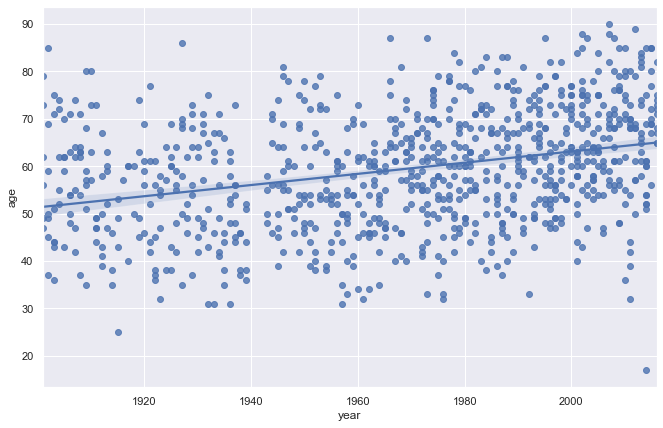

In [8]:
data['birth_data']=pd.to_datetime(data['birth_date'], infer_datetime_format=True)
data['age']=data['year']-data['birth_data'].dt.year
ax=sns.regplot(x='year',y='age',data=data)

<p>Es ist ein ansteigender Trend zu erkennen, die Streuung ist jedoch erheblich. Womöglich lässt sich das durch unterschiede in den Kategorien erklären.</p>

c:\users\jan\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


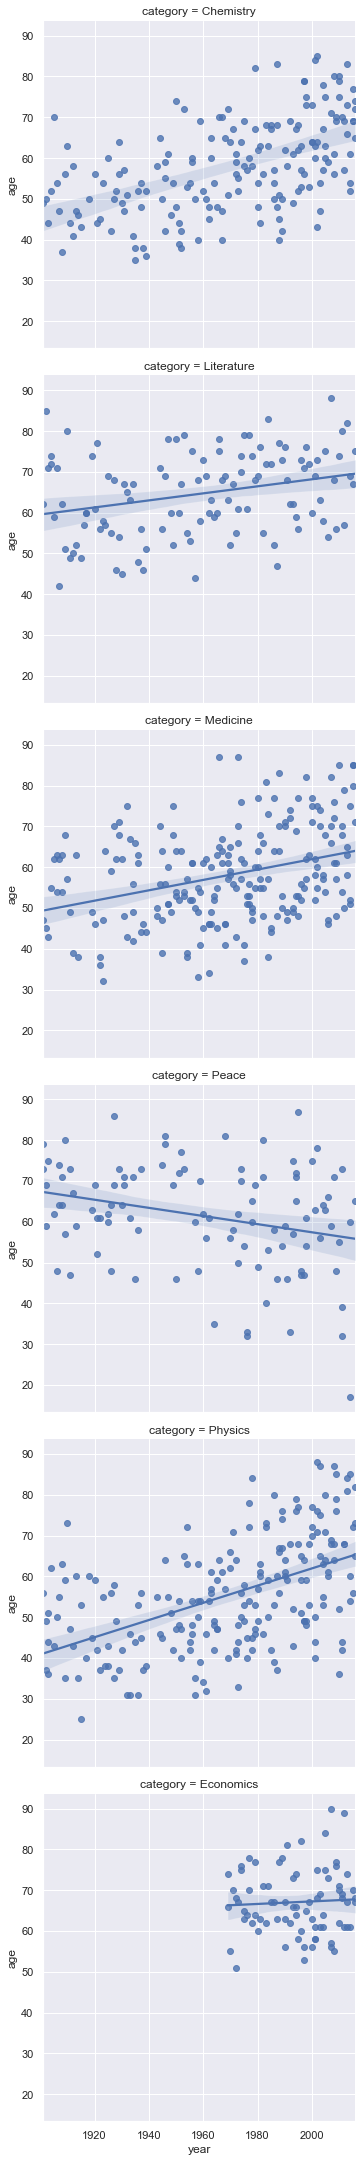

In [9]:
ax=sns.lmplot(x='year',y='age',data=data,row='category')

<p>Es ist auffallend, dass die das durchschnittliche Alter der Gewinner in allen Kategorien steigt, mit der Ausnahme des Friedenspreises.<\p>
<p>Eine mögliche Erklärung dafür ist, dass für die meisten andern Fachgebiete jahrelanges theoretisches Studium nötig ist.
    </p>
    
<p>Der älteste Gewinner und die jüngste Gewinneren sind:

In [10]:
display(data.nlargest(1,'age'))
display(data.nsmallest(1,'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,decade,is_female,usa_born_winner,birth_data,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,2000,False,False,1917-08-21,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,decade,is_female,usa_born_winner,birth_data,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,2010,True,False,1997-07-12,17.0
